In [24]:
from pandas import read_csv
kickstarter_filename = 'kickstarter_data_full.csv'
kickstarter_filename_features = 'kickstarter_data_with_features.csv'

ks_data = read_csv(kickstarter_filename)
ks_feat_data = read_csv(kickstarter_filename_features)
data_list = [('ks_data', ks_data), ('ks_feat_data', ks_feat_data)]

/tmp/ipykernel_6283/545315767.py:5: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ks_data = read_csv(kickstarter_filename)
/tmp/ipykernel_6283/545315767.py:6: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ks_feat_data = read_csv(kickstarter_filename_features)


In [41]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option

def data_info(_data):
    print(f'Data head: {_data.head(5)}')
    print(f'Null values: {_data.isnull().sum()}')
    print(f'Data Shape: {_data.shape[0]} rows and {_data.shape[1]} columns')
    print(f'Columns: {list(_data.columns)}')
    for column in _data.columns:
        if len(_data[column].unique()) < 10:
            print(f'{column} unique values: {_data[column].unique()}')
        else:
            percent_unique = len(_data[column].unique()) / _data.shape[0] * 100
            print(f'{column} % unique values: {percent_unique}')
    print(_data.describe())
    _data.hist()
    plt.tight_layout()
    plt.show()
    plt.figure() # new plot
    plt.tight_layout()

    # Only show for floats and ints

    float_columns = _data.select_dtypes(include=['float64']).columns
    int_columns = _data.select_dtypes(include=['int64']).columns
    # Combine float and int columns

    numeric_columns = float_columns.append(int_columns)
    # Calculate correlation matrix
    corMat = _data[numeric_columns].corr(method='pearson')

    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"CORRELATION MATRIX USING HEAT MAP")
    plt.show()

    ## scatter plot of all _data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    try:
        scatter_matrix(_data)
        plt.tight_layout(pad=0.1)
        plt.show()
    except:
        return

def data_info2(_date):
    set_option('display.max_columns', None)
    if not isinstance(_date, list):
        if not isinstance(_date, tuple):
            _date = ('', _date)
        _date = [_date]
    for name, data in _date:
        print(f'{name} data')
        print(data.info())
        print(data.head(5))
        for column in data.columns:
            highlight_column = 'profile'
            if column == highlight_column:
                # print 2 rows of values completely
                row1 = data.iloc[0][highlight_column]
                row2 = data.iloc[1][highlight_column]
                print(f'Row 1: {row1}')
                print(f'Row 2: {row2}')
            if len(data[column].unique()) < 10:
                print(f'{column} unique values: {data[column].unique()}')
            else:
                percent_unique = len(data[column].unique()) / data.shape[0] * 100
                print(f'{column} % unique values: {percent_unique}')
        break
#data_info2(ks_data)
columns_to_drop = ['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'slug', 'currency_symbol', 'currency_trailing_code', 'static_usd_rate', 'creator', 'profile', 'friends', 'is_backing', 'permissions', 'name_len', 'blurb_len', 'urls', 'source_url', 'location', 'is_starred', 'create_to_launch']
float_columns = ['goal', 'pledged', 'usd_pledged']
int_columns = ['backers_count', 'name_len_clean', 'blurb_len_clean',  'launch_to_deadline', 'launch_to_state_change', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', ]
datetime_columns = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
date_int_columns = ['deadline_month', 'deadline_day', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_hr', 'state_changed_at_hr', 'created_at_yr', 'launched_at_yr']
category_columns = ['state', 'currency', 'staff_pick', 'category', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_yr', 'country']
boolean_columns = ['disable_communication', 'spotlight', 'SuccessfulBool', 'USorGB', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend']

# This is just to categorize everything and make sure I'm not missing anything
temp_data = ks_data.copy()
temp_data = temp_data.drop(columns=columns_to_drop)
temp_data = temp_data.drop(columns=datetime_columns)
temp_data = temp_data.drop(columns=category_columns)
temp_data = temp_data.drop(columns=boolean_columns)
temp_data = temp_data.drop(columns=float_columns)
temp_data = temp_data.drop(columns=int_columns)
temp_data = temp_data.drop(columns=date_int_columns)
data_info2(('temp_data', temp_data))
kickstarter = ks_data.copy()
kickstarter = kickstarter.drop(columns=columns_to_drop)

temp_data data
<class 'pandas.core.frame.DataFrame'>
Index: 20627 entries, 0 to 20631
Empty DataFrame
None
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [26]:
# print columns not present in the other dataset
ks_data_columns = set(ks_data.columns)
ks_feat_data_columns = set(ks_feat_data.columns)

ks_data_not_in_feat = ks_data_columns - ks_feat_data_columns
ks_feat_data_not_in_ks = ks_feat_data_columns - ks_data_columns

print(f'Columns in ks_data not in ks_feat_data: {ks_data_not_in_feat}')
print(f'Columns in ks_feat_data not in ks_data: {ks_feat_data_not_in_ks}')

common_columns = ks_data_columns.intersection(ks_feat_data_columns)

# of common columns, compare the values and see if they match
for column in common_columns:
    ks_data_values = ks_data[column].unique()
    ks_feat_data_values = ks_feat_data[column].unique()
    if len(ks_data_values) != len(ks_feat_data_values):
        print(f'Column {column} has different number of unique values: {len(ks_data_values)} vs {len(ks_feat_data_values)}')
    else:
        pass

Columns in ks_data not in ks_feat_data: {'launch_to_state_change_days', 'SuccessfulBool', 'DeadlineWeekend', 'LaunchedTuesday', 'USorGB', 'launch_to_deadline_days', 'TOPCOUNTRY', 'create_to_launch_days'}
Columns in ks_feat_data not in ks_data: set()
Column launch_to_state_change has different number of unique values: 7544 vs 2477


In [27]:
#using ks_data from here out
# convert name_len_clean and blurb_len_clean to int from float

# Create an explicit copy before making changes
ks_data = ks_data.copy()

# convert name_len_clean and blurb_len_clean to int from float
# show unique values to make sure we can convert them all to int
ks_data['name_len_clean'].unique()
# show me the row with 'nan' in it to guage what it should be converted to
ks_data[ks_data['name_len_clean'].isnull()]
# Nulls are for test data and 3 others, so just drop them
ks_data = ks_data.dropna(subset=['name_len_clean'])
ks_data['name_len_clean'] = ks_data['name_len_clean'].astype(int)
ks_data['blurb_len_clean'] = ks_data['blurb_len_clean'].astype(int)


In [19]:
data_info2(('kickstarter', kickstarter))

kickstarter data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goal                         20632 non-null  float64
 1   pledged                      20632 non-null  float64
 2   state                        20632 non-null  object 
 3   disable_communication        20632 non-null  bool   
 4   country                      20632 non-null  object 
 5   currency                     20632 non-null  object 
 6   deadline                     20632 non-null  object 
 7   state_changed_at             20632 non-null  object 
 8   created_at                   20632 non-null  object 
 9   launched_at                  20632 non-null  object 
 10  staff_pick                   20632 non-null  bool   
 11  backers_count                20632 non-null  int64  
 12  usd_pledged                  20632 non-null  float64
 13 

## Now we know what is in the data, let's look at some of the features and see if we can find any interesting patterns.

In [ ]:
# For each feature, lets see a histogram of the values and a boxplot of the values

def plot_feature_distribution(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature])
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

columns_to_show = float_columns + int_columns + date_int_columns

for feature in kickstarter.columns:
    if feature in columns_to_show:
        plot_feature_distribution(kickstarter, feature)

In [43]:
columns_to_standardize = [ # Roughly normal
    'name_len_clean', 'blurb_len_clean',
    'deadline_month', 'deadline_day', 'deadline_hr',
    'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_hr',
    'created_at_month', 'created_at_day', 'created_at_hr',
    'launched_at_month', 'launched_at_day', 'launched_at_hr'
]

columns_to_log_transform = [ # Heavily right skewed
    'goal', 'pledged', 'usd_pledged', 'backers_count',
    'create_to_launch_days'
]

columns_to_normalize = [ # Different scales
    'launch_to_deadline_days', 'launch_to_state_change_days'
]

columns_to_drop = [
    # Temporal columns represented by better features
    'deadline', 'state_changed_at', 'created_at', 'launched_at',
    'launch_to_deadline', 'launch_to_state_change',

    # Duplicate/redundant information
    'deadline_yr', 'state_changed_at_yr', 'created_at_yr', 'launched_at_yr',

    # Categorical with many unique values, better represented by other features
    'country', 'currency',

    # Low variance or binary columns that might be redundant
    'disable_communication', 'spotlight',
    'USorGB', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend'
]

# Drop the columns we don't want
kickstarter = kickstarter.drop(columns=columns_to_drop)

In [44]:
print(kickstarter.columns)

Index(['goal', 'pledged', 'state', 'staff_pick', 'backers_count',
       'usd_pledged', 'category', 'name_len_clean', 'blurb_len_clean',
       'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday',
       'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'SuccessfulBool'],
      dtype='object')


Column state contains 'failed' values
Number of 'failed' values: 11416
     goal  pledged   state  disable_communication country currency  \
0  1500.0      0.0  failed                  False      US      USD   
1   500.0      0.0  failed                  False      US      USD   

          deadline state_changed_at        created_at       launched_at  \
0  1/23/2015 10:35  1/23/2015 10:35  11/29/2014 22:55  12/17/2014 13:47   
1   5/1/2015 16:13   5/1/2015 16:13    2/20/2015 9:28    3/2/2015 16:13   

   staff_pick  backers_count  usd_pledged  category  spotlight  \
0       False              0          0.0  Academic      False   
1       False              0          0.0  Academic      False   

   name_len_clean  blurb_len_clean deadline_weekday state_changed_at_weekday  \
0               9               16           Friday                   Friday   
1               4               15           Friday                   Friday   

  created_at_weekday launched_at_weekday  deadline_m

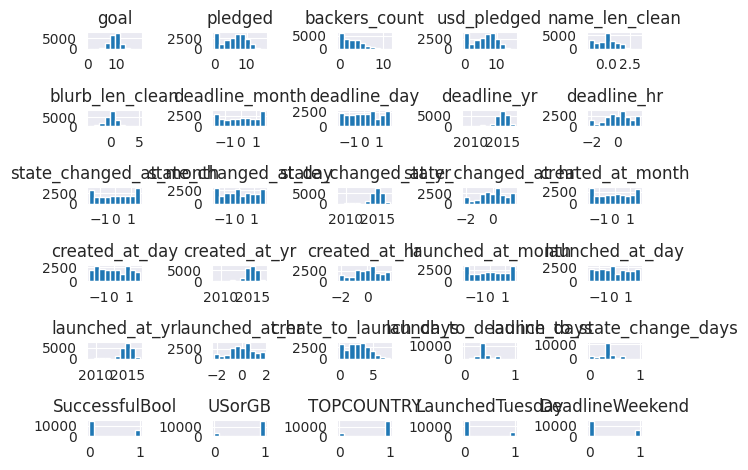

                                 goal   pledged  backers_count  usd_pledged  \
goal                         1.000000  0.124508       0.086695     0.110135   
pledged                      0.124508  1.000000       0.923833     0.996626   
backers_count                0.086695  0.923833       1.000000     0.926659   
usd_pledged                  0.110135  0.996626       0.926659     1.000000   
name_len_clean               0.067497  0.293642       0.279944     0.293808   
blurb_len_clean             -0.016618  0.060203       0.051668     0.060388   
deadline_month               0.011631  0.024957       0.027528     0.027791   
deadline_day                 0.001350 -0.008729      -0.007537    -0.008890   
deadline_hr                 -0.052325 -0.047389      -0.051055    -0.049720   
state_changed_at_month       0.014510  0.025832       0.028150     0.028451   
state_changed_at_day         0.000694 -0.010852      -0.009224    -0.010472   
state_changed_at_hr         -0.052017 -0.039996     

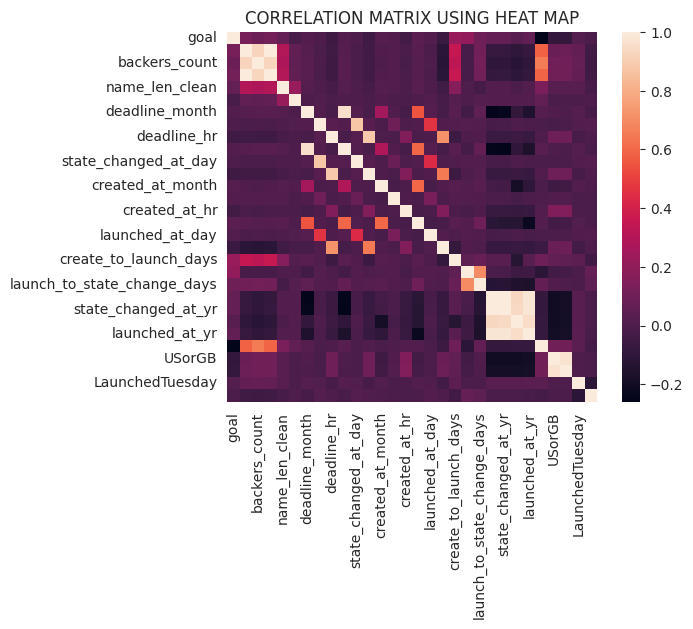

<Figure size 640x480 with 0 Axes>

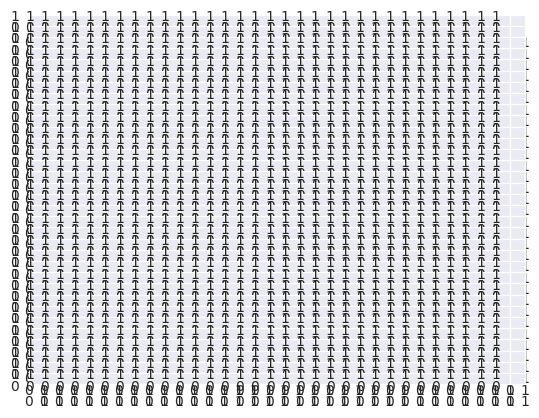

In [42]:
for column in kickstarter.columns:
    if column in kickstarter.columns:
        # Check if the column contains 'failed'
        if (kickstarter[column] == 'failed').any():
            print(f"Column {column} contains 'failed' values")
            # Count how many failed values
            failed_count = (kickstarter[column] == 'failed').sum()
            print(f"Number of 'failed' values: {failed_count}")
            # Show a few rows with the failed values
            print(kickstarter[kickstarter[column] == 'failed'].head(2))


# Standardize the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in columns_to_standardize:
    kickstarter[column] = scaler.fit_transform(kickstarter[[column]])

# Log transform the columns
from sklearn.preprocessing import FunctionTransformer
import numpy as np
log_transformer = FunctionTransformer(np.log1p, validate=True)
for column in columns_to_log_transform:
    kickstarter[column] = log_transformer.fit_transform(kickstarter[[column]])
# Normalize the columns
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
for column in columns_to_normalize:
    kickstarter[column] = normalizer.fit_transform(kickstarter[[column]])

# Check the data again
data_info(kickstarter)

In [49]:
# Let's try and determine a good output variable for our classifiers

# Compare 'state' and 'SuccessfulBool' to see if they are the same
print(ks_data['state'].unique())
print(ks_data['SuccessfulBool'].unique())
print(ks_data['state'].value_counts())
print(ks_data['SuccessfulBool'].value_counts())


# Make a table where the rows are 0/1 for SuccessfulBool and the columns are the states
print(ks_data.groupby(['SuccessfulBool', 'state']).size().unstack())
# So SuccessfulBool doesn't capture why it failed but does capture if it was successful

['failed' 'canceled' 'successful' 'live' 'suspended']
[0 1]
state
failed        11416
successful     6018
canceled       2455
live            508
suspended       230
Name: count, dtype: int64
SuccessfulBool
0    14609
1     6018
Name: count, dtype: int64
state           canceled   failed   live  successful  suspended
SuccessfulBool                                                 
0                 2455.0  11416.0  508.0         NaN      230.0
1                    NaN      NaN    NaN      6018.0        NaN


float64
float64
6009 projects got funded
count    20627.000000
mean         3.232841
std        177.339707
min          0.000000
25%          0.001500
50%          0.065480
75%          1.030000
max      22603.000000
Name: got_funded, dtype: float64
SuccessfulBool
0    14609
1     6018
Name: count, dtype: int64


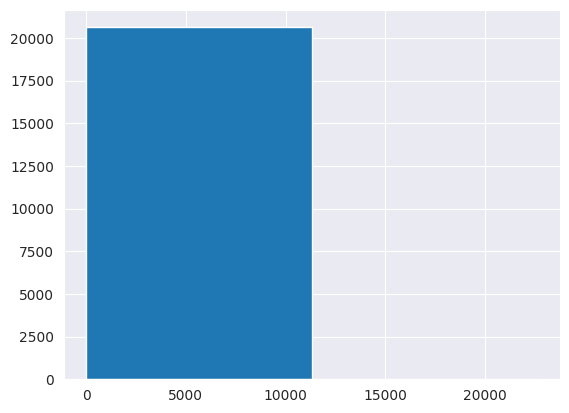

In [64]:
# Show the distribution of 'pledged/goal' to see if we can make a column called 'got_funded'
temp_data = ks_data.copy()

# confirm they're both numbers
print(temp_data['pledged'].dtype)
print(temp_data['goal'].dtype)

# show the count where pledged > goal
print(f'{temp_data[temp_data['pledged'] > temp_data['goal']].shape[0]} projects got funded')

# Create got_funded column and show the histogram
temp_data['got_funded'] = temp_data['pledged'] / temp_data['goal']
temp_data['got_funded'].hist(bins=2)

# Describe the column
print(temp_data['got_funded'].describe())

check_data = ks_data.copy()

# Get count of SuccessfulBool
print(check_data['SuccessfulBool'].value_counts())
# Shows the same thing